# Project : Predict "Play Badminton"

> # Import Libraries & Read Dataset

In [1]:
import requests

url = 'https://raw.githubusercontent.com/lko9911/Kaggle/master/Compare_Classifier_models.py'

r = requests.get(url)

with open('Compare_Classifier_models.py', 'w') as f:
    f.write(r.text)

In [2]:
# For Compare modeling
from Compare_Classifier_models import evaluate_models

# For EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
df = pd.read_csv('/kaggle/input/play-badminton/badminton_dataset.csv')
df.head()

,Outlook,Temperature,Humidity,Wind,Play_Badminton
0,Overcast,Cool,High,Weak,Yes
1,Sunny,Mild,Normal,Strong,No
2,Rain,Mild,Normal,Strong,No
3,Sunny,Cool,High,Weak,Yes
4,Sunny,Cool,High,Strong,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Outlook         36 non-null     object
 1   Temperature     36 non-null     object
 2   Humidity        36 non-null     object
 3   Wind            36 non-null     object
 4   Play_Badminton  36 non-null     object
dtypes: object(5)
memory usage: 1.5+ KB


> # Data Preprocessing

In [5]:
df.isna().sum()

Outlook           0
Temperature       0
Humidity          0
Wind              0
Play_Badminton    0
dtype: int64

In [6]:
cols = df.columns.tolist()

for col in cols:
    unique_count = df[col].nunique()
    print(f'{col} has {unique_count} unique values')

Outlook has 3 unique values
Temperature has 3 unique values
Humidity has 2 unique values
Wind has 2 unique values
Play_Badminton has 2 unique values


In [7]:
for col in cols:
    unique_name = df[col].unique()
    print(f'{col} has {unique_name}')

Outlook has ['Overcast' 'Sunny' 'Rain']
Temperature has ['Cool' 'Mild' 'Hot']
Humidity has ['High' 'Normal']
Wind has ['Weak' 'Strong']
Play_Badminton has ['Yes' 'No']


In [8]:
def Yes_No(value):
    return 1 if value == 'Yes' else 0

def Humidity(value):
    return 1 if value == 'High' else 0

def Wind(value):
    return 1 if value == 'Weak' else 0

df['Play_Badminton'] = df['Play_Badminton'].apply(Yes_No)
df['Humidity'] = df['Humidity'].apply(Humidity)
df['Wind'] = df['Wind'].apply(Wind)

In [9]:
df = pd.get_dummies(df,columns=['Outlook','Temperature'], drop_first=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Humidity          36 non-null     int64
 1   Wind              36 non-null     int64
 2   Play_Badminton    36 non-null     int64
 3   Outlook_Rain      36 non-null     bool 
 4   Outlook_Sunny     36 non-null     bool 
 5   Temperature_Hot   36 non-null     bool 
 6   Temperature_Mild  36 non-null     bool 
dtypes: bool(4), int64(3)
memory usage: 1.1 KB


> # Compare models

In [11]:
X = df.drop("Play_Badminton", axis=1)
y = df["Play_Badminton"]

evaluate_models(X, y)

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 9, number of negative: 19
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 28, number of used features: 0
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.321429 -> initscore=-0.747214
[LightGBM] [Info] Start training from score -0.747214
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because th

,Model,Accuracy
0,Logistic Regression,1.000
1,Decision Tree Classifier,1.000
2,Random Forest Classifier,1.000
3,Support Vector Classifier,1.000
4,K-Nearest Neighbors Classifier,1.000
5,XGBoost Classifier,1.000
6,LightGBM Classifier,0.625


> # Correlation Heatmap

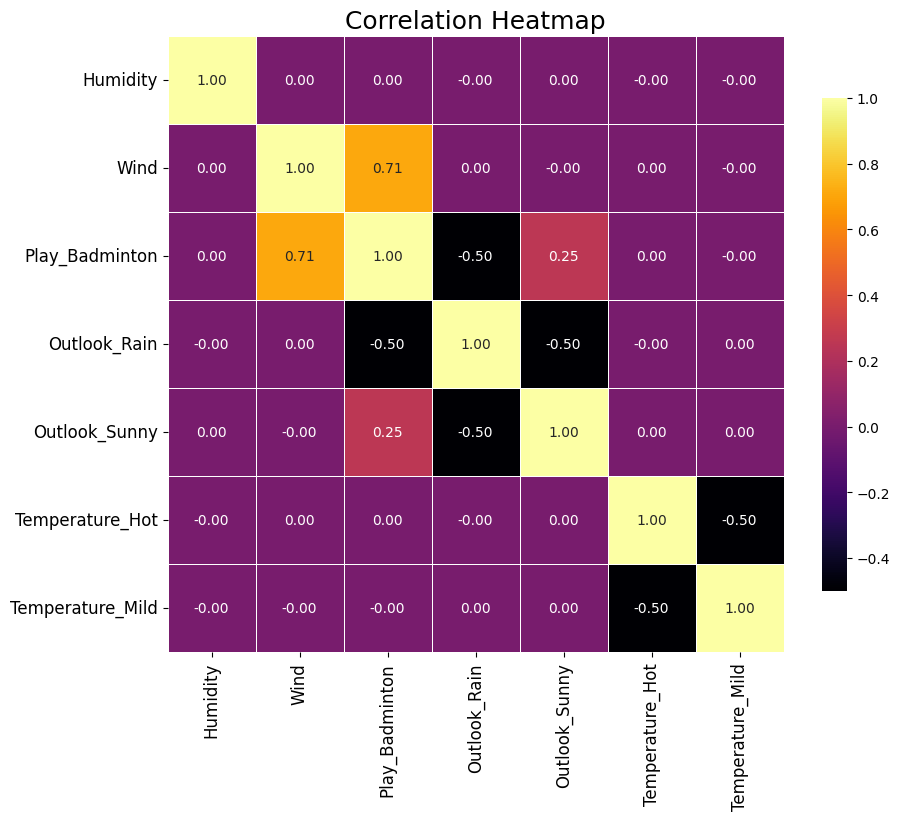

In [12]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, 
            annot=True,  
            fmt=".2f",  
            cmap='inferno',  
            linewidths=.5, 
            square=True,  
            cbar_kws={"shrink": 0.8},  
            annot_kws={"size": 10},  
            )
plt.title('Correlation Heatmap', fontsize=18)  
plt.xticks(fontsize=12)  
plt.yticks(fontsize=12)  
plt.show()

# Thanks